# Assignment 1 - Data Collection & Preparation

The objective of this assignment is to scrape a corpus of news articles from a set of web-pages, perform some pre-processing on the corpus, and evaluate the performance of automated classification of these articles in a supervised learning context. 

For this assignment the classification models used were the K-nearest neighbour, Naive Bayes, and for extra insight Support Vector Machines classification was also used. 

However, before classification models could be applied, data was required for testing.

## Part 1: Data Collection

The goal for this assignment was to collect a labelled news corpus with category labels for all the news articles on the website: http://mlg.ucd.ie/modules/COMP41680/archive/index.html

I decided to create directories for articles and category labels, saving each article's title and body of text into individual numbered text files ("#_article.txt"), and the category labels into a single text file ("Categories.txt").

The following packages were imported:
1. Urllib for opening and reading URLs.
2. BeautifulSoup (bs4) for parsing the HTML from each URL.
3. Operating System (os) for creating new directories for sroting articles and category labels.


In [1]:
import urllib
import bs4
import os

The initial URL was opened and parsed such that the paths for month URLs could be scraped into a list for future link creation.

In [2]:
link = "http://mlg.ucd.ie/modules/COMP41680/archive/"
response = urllib.request.urlopen(link + "index.html")
html = response.read()
parser = bs4.BeautifulSoup(html, 'html.parser')

Printing the results from this, it can be seen that the months are stored under the ```<a>``` tags.

In [3]:
print(parser)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Note: This data is made only available for educational purposes for use COMP41680 Assignment 2 -->
<title>Online News Archive</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="noindex" name="robots"/>
<meta content="news,articles,news" name="keywords">
<link href="http://www.insight-centre.org/sites/all/themes/bootstrap_insight/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<meta content="Breaking News | International Headlines" property="og:title"/>
<meta content="News Archive" property="og:site_name"/>
<meta content="Latest news and more from the definitive brand of quality news." property="og:description"/>
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<script src="js/bootstrap.min.js"></script>
<style>
	  		.main{ padding: 0; text-align: center;}
	  		.footer{ padding: 6px;text-align: center; margin-top: 1em; }

	  		h1
	  		{
	  			font-size:

I looped through the parser to find all ```<a>``` tags and get the text in the href for each.

In [4]:
# Get list of URLs for each month
months = []
for match in parser.find_all("a"):
    months.append(match.get('href'))
    
months

['month-jan-2017.html',
 'month-feb-2017.html',
 'month-mar-2017.html',
 'month-apr-2017.html',
 'month-may-2017.html',
 'month-jun-2017.html',
 'month-jul-2017.html',
 'month-aug-2017.html',
 'month-sep-2017.html',
 'month-oct-2017.html',
 'month-nov-2017.html',
 'month-dec-2017.html',
 '',
 '',
 '']

This list then contained empty elements as there were later some ```<a>``` tages with empty links inside them. These empty months are then removed from this list with a simple while loop to clean up the list.

In [5]:
# Remove empty stings from the months urls
while '' in months:
    months.remove('')
    
months

['month-jan-2017.html',
 'month-feb-2017.html',
 'month-mar-2017.html',
 'month-apr-2017.html',
 'month-may-2017.html',
 'month-jun-2017.html',
 'month-jul-2017.html',
 'month-aug-2017.html',
 'month-sep-2017.html',
 'month-oct-2017.html',
 'month-nov-2017.html',
 'month-dec-2017.html']

These months values in the list are the path additions which must be placed at the end of the URL 'link' above such that URLs for individual articles in each month can be accessed.

Before any data is scraped and stored, I created the following directories for the article files and Category file to be stored.

In [6]:
# create a directory for the categories text file
try:
    os.stat('Categories')
except:
    os.mkdir('Categories')

# create a directory for the articles text files
try:
    os.stat('Article_text_files')
except:
    os.mkdir('Article_text_files')

I next loop through each months URL, scraping the html and parsing again with Beautiful Soup. The article paths for each month are stored into a list called articles, and the categories are stored into the Categories.txt file. In the categories scraping, the "N/A" values are skipped and only defined categories are stored.

In [7]:
# Get articles and categories from each month's news link
articles = []
categories = []
f = open("Categories\\Categories.txt", "w", encoding="utf-8")
for n in range(0,12):
    link_month = link+months[n]
    response_month = urllib.request.urlopen(link_month)
    html = response_month.read()
    parser = bs4.BeautifulSoup(html, 'html.parser')
    for match in parser.find_all("a"):
        if "article" not in match.get('href'):
            continue
        else:
            articles.append(match.get('href'))

    for match in parser.find_all("td", class_='category'):
        if "N/A" not in match.get_text():
            f.write(match.get_text()+"\n")
            # Categories saved in a list for counting purposes only
            categories.append(match.get_text())
    print("Categories month %d" %n)
    
f.close

print(len(categories)," category labels saved")

Categories month 0
Categories month 1
Categories month 2
Categories month 3
Categories month 4
Categories month 5
Categories month 6
Categories month 7
Categories month 8
Categories month 9
Categories month 10
Categories month 11
1408  category labels saved


Now each category for each article is stored in a single file for later, and only the articles are yet to be stored.

The article path additions for the URLs are stored in the 'articles' variable. These URLs can now be iterated through to store the text from each in individual files. In order to do this, a function was made which took in the article URL and returned the relevant text in each article, including the title and the body of text.

This function is defined as 'save_text()' below.

In [8]:
# Function to return article text and heading
def save_text(article_url):
    response = urllib.request.urlopen(article_url)
    html = response.read()
    parser = bs4.BeautifulSoup(html, 'html.parser')
    text = ""
    # print(parser)
    for match in parser.find_all("h2"):
        text = match.get_text()
    for match in parser.find_all("p"):
        if match.get_text() == "Return to article search results":
            continue
        else:
            text = text+"\n"+match.get_text()
    return text

Finally each of the articles would need to be saved to individual files for later processing. To do this, the articles variable is looped through whereby the 'save_text()' function is then invoked for each article's URL. The articles are saved to individual text files numbered by their position in the articles list. The character encoding "utf-8" is used such that unicode characters can also be saved.

I print a sample article (first article) to prove the text is being stored as desired. A download percentage complete is printed then for tracking of the process of saving articles.

In [10]:
x = int(len(articles)/20)
for n in range(0,len(articles)):
    text = save_text(link+articles[n])
    f = open("Article_text_files\\"+str(n)+"_article.txt", "w", encoding="utf-8")
    if n==0:
        print("Sample article text:")
        print("----------------------------------------------------------")
        print(text)
        print("----------------------------------------------------------\n")
        print("Downloading")
    if n > x: 
        perc = int((n*100)/len(articles))
        print("%d%% Complete"%perc)
        x = x+int(len(articles)/20)
    f.write(text)
    f.close()
    
print("100% Complete\n")
print("%d Articles Saved" %len(articles))

Sample article text:
----------------------------------------------------------
21st-Century Sports: How Digital Technology Is Changing the Face Of The Sporting Industry

The sporting industry has come a long way since the ‘60s. It has carved out for itself a niche with its roots so deep that I cannot fathom the sports industry showing any sign of decline any time soon - or later.

The reason can be found in this seemingly subtle difference - other industries have customers; the sporting industry has fans. Vivek Ranadivé, leader of the ownership group of the NBA’s Sacramento Kings, explained it beautifully, “Fans will paint their face purple, fans will evangelize. ... Every other CEO in every business is dying to be in our position — they’re dying to have fans.“

While fan passion alone could almost certainly keep the industry going, leagues and sporting franchises have decided not to rest on their laurels. The last few years have seen the steady introduction of technology into the wor

Now I have all article headings and text bodies saved in individual numbered text files, and the category labels for each article saved in a single text file. These articles to create a text classification model which can predict the category of an article based on its textual contents.

## Part 2: Text Classification

The goal of the second part of this assignment is to anaylse this corpus of news articles and category labels from part 1 in a text classification context. 

Before the classification models can be created, some pre-processing is necessary with tokenisation, lemmatisation, vectorisation and some other pre-processing steps.

Scikit has a range of different classification algorithms, and also enables tokenisation and vectorisation for dealing with English text. The following packages were imported for some text pre-processing.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import WordNetLemmatizer

### <font color='green'>**_1. Save articles and categories in lists_**</font>

The first step was to load the article text files and categories into lists such that they could be processed. The articles were loaded into a list whereby each article was appended as an individual string element in the list. A small loop was also included to ensure the text was all lowercase.

The category labels were also all loaded into a list with elements for each category, whereby the n<sup>th</sup> element in the category list matched with the n<sup>th</sup> element in the article list.

In [12]:
# Save articles and categories in lists 

articles = []
num_articles = 1408

# Save articles inyo a list
for n in range(0,num_articles):
    article = open("Article_text_files\\"+str(n)+"_article.txt", "r", encoding="utf8")
    text = article.read()
    articles.append(text)
  
 # Change all article text to lowercase
for x in articles:
    x.lower()
    
print("Number of articles: ", len(articles))

# Save categories into a list
f = open("Categories\\Categories.txt", encoding="utf8")
text = f.read()
categories = text.strip().split()

print("Number of category labels: ", len(categories))

Number of articles:  1408
Number of category labels:  1408


### <font color='green'>**_2. Vectorisation and pre-processing_**</font>

Now that all articles and category labels are saved in lists, pre-processing and vectorisation must be applied such that the articles are stored in a bag-of-words model representation. In this model, each article is represented by a term vector for each term in the article. The term vector from each article is stacked to generate a full document-term matrix. 

The first step in this process is the creation of a custom tokenizing function 'lemma_tokenizer()'. This function uses the third party **NLTK** library and the WordNetLemmatizer() function to lemmatise the tokens.

In [13]:
def lemma_tokenizer(text):
    # use the standard scikit-learn tokenizer first
    tokenizer = CountVectorizer().build_tokenizer()
    tokens = tokenizer(text)
    # Then use the NLTK to perform lemmatisation on each token
    lemma_tokens = []
    lemmatizer = WordNetLemmatizer()
    for token in tokens:
        lemma_tokens.append(lemmatizer.lemmatize(token))
    return lemma_tokens

This function uses lemmatization, reducing the words to their canonical form. This is an advanced form of stemming which removes things like tense or plurals.

Now using this custom tokenizing function, I can vectorize the articles with some further pre-processing. I decided to exclude stop-words from my count using the built-in list of stop-words for the english language specified by the name of the language in lower-case; "english".

I also applied a filter for terms appearing in less than 5 documents with 'min_df=5'.

In [14]:
vectorizer = CountVectorizer(tokenizer=lemma_tokenizer,stop_words="english", min_df=5)
data_counts = vectorizer.fit_transform(articles)

data_counts.shape

(1408, 6101)

This term vector 'data_counts' now consists of stacked term vectors for each of the article whereby the count for each term is included in the cell for that document. The number of terms in the term vector is 6101 with 1408 documents.

This is not the most accurate way to perform vectorization since this would give more weight to longer documents than shorter ones. To fix this, instead term freqiencies are used instead, ie. the number count for the word divided by the total number of words in the document.

A further step here is to use **TF_IDF** which is term frequency inverse document frequency. This gives the effect of penalising common terms appearing in every document.

Implementing this requires the use of a TF_IDF transformer which creates a transformed term vector from the original count vector.

In [15]:
# Term frequency weighting
tfidf_transformer = TfidfTransformer()
data_tfidf = tfidf_transformer.fit_transform(data_counts)

data_tfidf.shape

(1408, 6101)

As expected, this still has the same vector dimensions. 

### <font color='green'>**_3. Classification_**</font>

Now that I have all the article data saved in a data vector, this data must be split for classification purposes. Classification requires 4 variables for a model, predictions and testing to be made.

1. dataset_train: The set of article data whic is used to train the model.
2. target_train: The set of category labels for these articles to train the model.
3. dataset_test: The set of articles which are held back for evaluation of the model
4. target_test: The set of category labels which are held back for evaluation of predictions.

The sklearn package provides functionality to randomly split the train and test data of defined test size proportions. I chose to hold back 20% of the data for testing of the model predictions. 

In [16]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data_tfidf, categories, test_size=0.2)

#### <font color='green'>**_3.1. Naive Bayes Model_**</font>

The first classification model tested was the Naive Bayes classifier. This model is not the most accurate as it assumes each document as independent. It is a popular classification model for text categorisation as we are performing here, however as the name suggests, it is quite naive in assuming independence between features.

A good explanation for the operation of this classifier is in the classification of an apple. If an apple has the features that it is red, it is round and it is a fruit, the naive classifier considers these features to contribute indipendently to the classification of this apple, despite any correlations that may occur between its features.

This model is made available through the sklearn package.

In [17]:
from sklearn.naive_bayes import MultinomialNB

model_NB = MultinomialNB()
model_NB.fit(data_train, target_train)
predicted_NB = model_NB.predict(data_test)

#### <font color='green'>**_3.2. K-Nearest Neighbour_**</font>

The second classification method tested was the KNN model. In this model, the article is classified on a majority vote of its nearest neighbours. The article is then assigned the category of the majority vote of these k nearest neighbours. If k=3 then the article being predicted for is assigned the category of the majority vote from the 3 nearest neighbours. 

I chose to stay with the default value of k=5 which is defined by leaving the model function empty.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()
model_KNN.fit(data_train, target_train)
predicted_KNN = model_KNN.predict(data_test)

#### <font color='green'>**_3.2. Support Vector Classification_**</font>

As a final classification method I also decided to test the support vector classifier. This model is much more advanced than the NB or KNN models. 

The SVC uses a kernel function to accuratley separate different classes. With no tuning, the default is to use a estimate whether to use a linear or non-linear kernel, however, this gives a very low performance in the range of about 0.35-0.4 accuracy. Since the number of classes is only 3, it is most likely going to be a linear model and some parameter tuning is required whereby the kernel is set to 'linear' resulting in both increased performance and accuracy in the SVC model (as shown later).

In [19]:
from sklearn.svm import SVC

model_SVC = SVC(kernel='linear')
model_SVC.fit(data_train, target_train)
predicted_SVC = model_SVC.predict(data_test)

### <font color='green'>**_4. Classifier Evaluation_**</font>

The standard method of evaluating classifiers is to split the data into training data and test data as done above. This split is done by randomly holding back 20% of the data for evaluation here.

#### <font color='green'>**_4.1. Accuracy Score_**</font>
The first test used is an accuracy score for each model. This is the fraction of correct predictions to total predictions made. This accuracy score evaluation is made available by importing from the sklearn.metrics package.

Predictions are made for each of the models using the same 20% of data held back and classifiers are compared using their accuracy score.

In [20]:
from sklearn.metrics import accuracy_score

acc_NB = accuracy_score(target_test, predicted_NB)
print("Accuracy Score NB: ", acc_NB)

acc_KNN = accuracy_score(target_test, predicted_KNN)
print("Accuracy Score KNN: ", acc_KNN)

acc_SVC = accuracy_score(target_test, predicted_SVC)
print("Accuracy Score SVC: ", acc_SVC)

Accuracy Score NB:  0.9680851063829787
Accuracy Score KNN:  0.9716312056737588
Accuracy Score SVC:  0.9893617021276596


The accuracy score for each model is very good, with the KNN often resulting in a lower accuracy than NB and SVC. Improved evaluation schemes which give further information are shown below.

#### <font color='green'>**_4.2. Confusion Matrix_**</font>

Confusion matrix provides the different aspects of classifier performance by showing where the articles are true or false positive, and true or false negative.

This confusion method can be evaluated in python for each of the models above. In order to present the confusion matrix in a presentable colour map, the function plot_confusion_matrix from the sklearn documentation is used (1).

(1) - (http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

In [21]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # The confusion matrix can be normalised
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The function allows the confusion matrix to be presented showing the predicted labels and the true labels. The function also gives the option to normalize this data.

Before the confusion matrix could be evaluated, the target names needed to be explicitly named. This is performed using the OrderdDict library from the collections package, which removes the duplicate category names.

Confusion matrix, without normalization
[[ 92   0   2]
 [  0 109   3]
 [  4   0  72]]


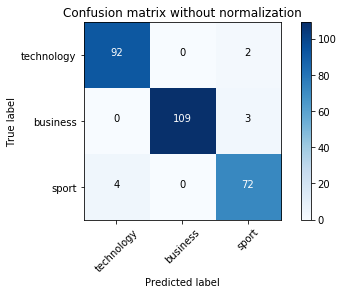

In [22]:
from collections import OrderedDict

target_names = list(OrderedDict.fromkeys(categories))

cm_NB = confusion_matrix(predicted_NB, target_test)

plt.figure()
plot_confusion_matrix(cm_NB, classes=target_names, normalize=False, title='Confusion matrix without normalization')
plt.show()

From this the true and predicted labels can be seen where the total number of articles sums to 282 which is approximately 20% of the original 1408 articles which were held back for testing.

This confusion matrix can be normalised by including in the parameters 'normalize=True'.

Normalized confusion matrix
[[0.98 0.   0.02]
 [0.   0.97 0.03]
 [0.05 0.   0.95]]


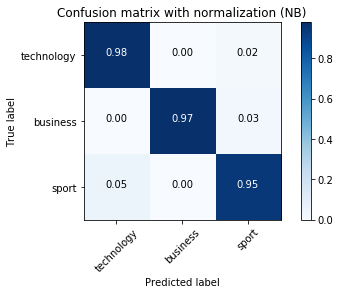

In [23]:
cm_NB = confusion_matrix(predicted_NB, target_test)

plt.figure()
plot_confusion_matrix(cm_NB, classes=target_names, normalize=True, title='Confusion matrix with normalization (NB)')
plt.show()

Applying this to the KNN and SVC classifications also gives the following confusion matrices.

Normalized confusion matrix
[[0.99 0.01 0.  ]
 [0.01 0.98 0.01]
 [0.06 0.   0.94]]


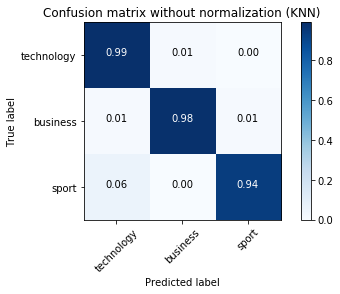

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.99 0.01]
 [0.03 0.   0.97]]


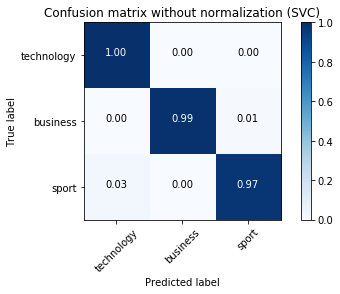

In [24]:
cm_KNN = confusion_matrix(predicted_KNN, target_test)

plt.figure()
plot_confusion_matrix(cm_KNN, classes=target_names, normalize=True, title='Confusion matrix without normalization (KNN)')
plt.show()

cm_SVC = confusion_matrix(predicted_SVC, target_test)

plt.figure()
plot_confusion_matrix(cm_SVC, classes=target_names, normalize=True, title='Confusion matrix without normalization (SVC)')
plt.show()

From this the innacuracies in each model can be seen. There are false predicted labels in most categories.

The benefit of the confusion matrix over the accuracy score can be seen then when when the original accuracy score is the same between different models. Although the accuracy scores are the same, we can now see if there is a difference between the errors that have occurred.

#### <font color='green'>**_4.3. Cross Validation_**</font>

When performing classification, the problem with splitting the data between training data and test data is that each split may give different resilts. This is where k-fold cross validation can be used.

K-fold cross validation splits the data into _k_ different bins. Each of these bins is then used individually as a test set with the rest of the data as the training data set.

This is implemented on the data using _k=10_ folds for each model. The scores for each test is summed and averaged to find the overall accuracy for the classifier accross all cross-validation folds.

In [25]:
from sklearn.model_selection import cross_val_score
np.set_printoptions(precision=2)

scores_NB = cross_val_score(model_NB, data_tfidf, categories, cv=10, scoring='accuracy')
final_score_NB =  scores_NB.mean()

print("----------------------NB-----------------------")
print("Naive Bayes Scores: ")
print(scores_NB)
print("\nFinal k=10 cross validation accuracy (NB): ")
print(final_score_NB)

scores_KNN = cross_val_score(model_KNN, data_tfidf, categories, cv=10, scoring='accuracy')
final_score_KNN =  scores_KNN.mean()

print("\n----------------------KNN----------------------")
print("K-Nearest Neighbour Scores: ")
print(scores_KNN)
print("\nFinal k=10 cross validation accuracy (KNN): ")
print(final_score_KNN)

scores_SVC = cross_val_score(model_SVC, data_tfidf, categories, cv=10, scoring='accuracy')
final_score_SVC =  scores_SVC.mean()

print("\n----------------------SVC----------------------")
print("Support Vector Classification Scores: ")
print(scores_SVC)
print("\nFinal k=10 cross validation accuracy (SVC): ")
print(final_score_SVC)
print("-----------------------------------------------")

----------------------NB-----------------------
Naive Bayes Scores: 
[0.99 0.99 1.   0.99 0.96 0.96 0.98 0.99 0.99 0.95]

Final k=10 cross validation accuracy (NB): 
0.980095826159656

----------------------KNN----------------------
K-Nearest Neighbour Scores: 
[0.97 0.96 0.98 0.96 0.94 0.96 0.97 0.97 0.94 0.95]

Final k=10 cross validation accuracy (KNN): 
0.9609259889047121

----------------------SVC----------------------
Support Vector Classification Scores: 
[0.98 0.99 0.99 0.99 0.97 1.   0.99 0.98 0.99 0.97]

Final k=10 cross validation accuracy (SVC): 
0.9850854818939926
-----------------------------------------------


Again here the performance of each model is quite similar in that they are all generally very good with above 90% accuracy for text classification, with KNN performing slightly worse than NB and SVC. The number of folds can be increased or decreased, however the more folds used, the more accurate your cross validation will be. Since this is text classification and it is not very computationally heavy, I have used 10 folds to eunsure an accurate average is calculated.

### <font color='green'>**_5. Conclusion_**</font>

The performance of each of these classifiers are very good in all cases here. This is most likely due to the fact that text categorisation is being performed which is generally quite an easy classification task. Coupled with the fact that only 3 targets are sought with the predictions. 

The benefits of using one classification model over another would become more apparent if the performance of image recognition, speech recognition or face detection were being performed. This would result in the number of targets being greatly increased, and some models may prove themselves better than others. Generalising to some extent, it is regarded in machine learning that of the 3 models used here, the SVC model is preferred as the most accurate.